In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import datasets
from scipy.stats import t
from yellowbrick.regressor import ResidualsPlot
import statsmodels.formula.api as smf
from patsy import dmatrices, dmatrix

dat = pd.read_csv('auto.csv')
# convert horsepower from string to float and mean fill the 5 missing values.
hp = pd.to_numeric(dat['horsepower'], downcast='float', errors='coerce')
hp = hp.fillna(value=hp.mean())
dat['horsepower'] = hp

#### Question 8

In [3]:
X = sm.add_constant(dat['horsepower'])
est = sm.OLS(dat['mpg'], X).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.595
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     580.6
Date:                Wed, 09 Jan 2019   Prob (F-statistic):           1.45e-79
Time:                        09:41:39   Log-Likelihood:                -1200.1
No. Observations:                 397   AIC:                             2404.
Df Residuals:                     395   BIC:                             2412.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         40.0058      0.729     54.903      0.0



##### a.i Is there a relationship between the predictor and the response?

Yes - a statistically significant releationship exists.

- The coefficeint for the horsepower paramater is non-zero: -0.1578
- The coefficeint for the horsepower paramater has a low standard error: 0.007
- ... the ratio between these quantites (t-statistic) has a large absolute value: -24.096
- The p-value for the t-statistic is < 10^-3
- Therefore we can reject the null hypothesis.

##### a.ii How strong is the relationship between the predictor and the response?

- ~ 60% of the variance in mpg is explained by horsepower (R-squared: 0.595).


##### a.iii Is the relationship between the predictor and the response positive or negative?
- negative.

#### iv. What is the predicted mpg associated with a horsepower of 98?  What are the associated 95% confidence and prediction intervals?

In [4]:
est.get_prediction(np.array([1, 98])).summary_frame(alpha=0.05)

mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0  24.537028  0.253797      24.038067      25.035989     14.722193   

   obs_ci_upper  
0     34.351862

##### (b) Plot the response and the predictor.

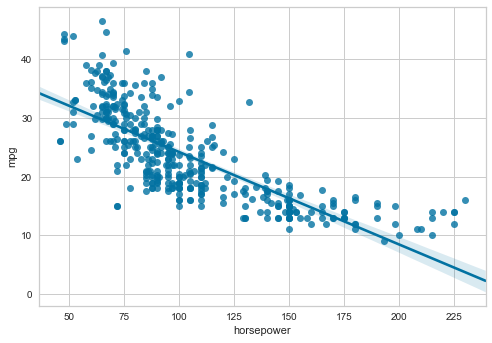

In [6]:
sns.regplot(x='horsepower', y='mpg', data=dat)
X = sm.add_constant(dat['horsepower'])
est = sm.OLS(dat['mpg'], X).fit()

##### (c) Produce diagnostic plots of the least squares regression fit. Comment on any problems you see with the fit.

- There is a strong pattern, indicating non-linearity in the data.

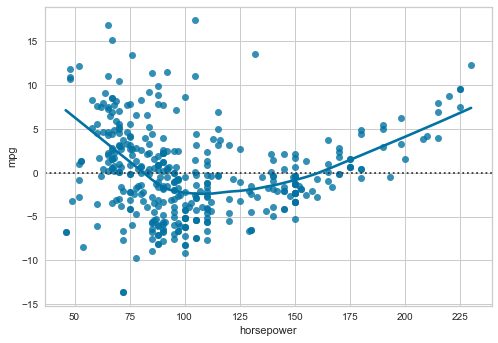

In [7]:
sns.residplot(dat['horsepower'], dat['mpg'], lowess=True)

#### Question 9

##### (a) Produce a scatterplot matrix which includes all of the variables in the data set.

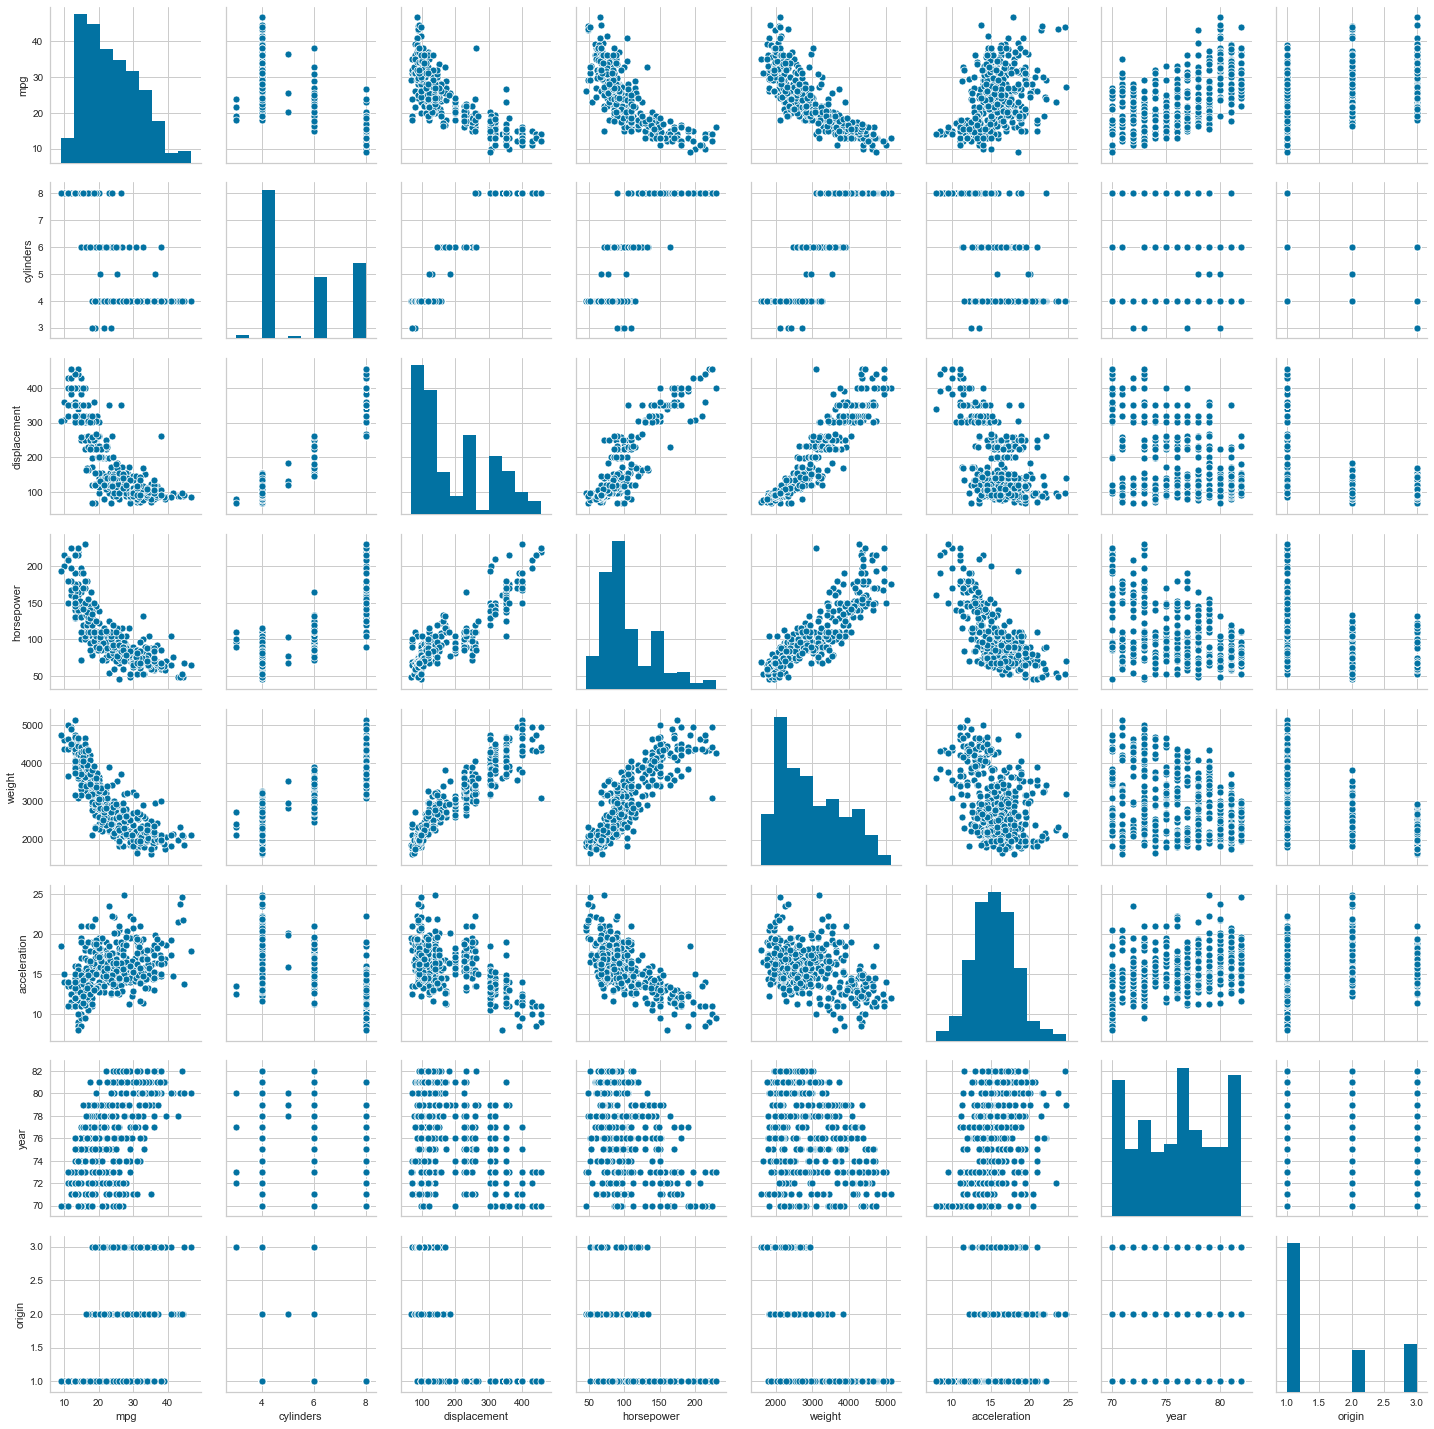

In [153]:
sns.pairplot(dat)

#### (b) Compute the matrix of correlations between the variables using the function cor().

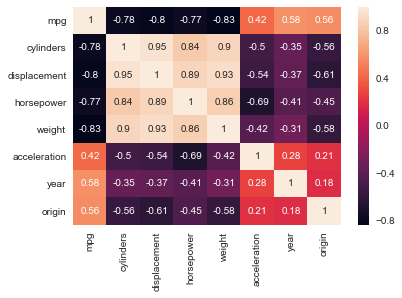

In [156]:
sns.heatmap(dat.corr(), annot=True)

##### (c) Use the lm() function to perform a multiple linear regression with mpg as the response and all other variables except name as the predictors.

In [158]:
X = sm.add_constant(dat).drop(['name', 'mpg'], axis=1)
est = sm.OLS(dat['mpg'], X).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     256.0
Date:                Wed, 05 Sep 2018   Prob (F-statistic):          2.41e-141
Time:                        10:53:54   Log-Likelihood:                -1037.4
No. Observations:                 397   AIC:                             2091.
Df Residuals:                     389   BIC:                             2123.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -18.7116      4.609     -4.060   


##### ci. Is there a relationship between the predictors and the response?

- Yes - a statistically siginificant relationship exists.
- The F-statistic is very large: 256.0
- We can reject the null hypothesis.

##### cii. Which predictors appear to have a statistically significant relationship to the response?

- displacement, year, origin and weight (p-values < 0.05)

##### ciii. What does the coefficient for the year variable suggest?

-  The coefficient is large relative to the others - it is an important predictor.
- There is a positive relationship between year and mpg - one additional year corresponds to a 0.7625 increase in mpg.

##### (d) Produce diagnostic plots of the linear regression fit.

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


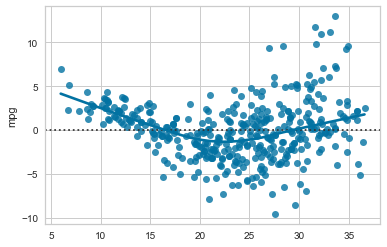

In [159]:
# Residual plot with sklearn and seaborn

X = dat.drop(['mpg', 'name'], axis=1)
y = dat['mpg']
regr = LinearRegression()
regr.fit(X, y)
y_hat = regr.predict(X)
resid = y - y_hat
sns.residplot(y_hat, resid,lowess=True)

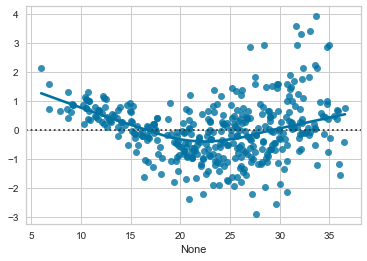

In [160]:
# Studentised residuals plot with statsmodels and seaborn

X = sm.add_constant(dat).drop(['name', 'mpg'], axis=1)
est = sm.OLS(dat['mpg'], X).fit()
sns.residplot(est.fittedvalues, est.get_influence().resid_studentized_internal,lowess=True)

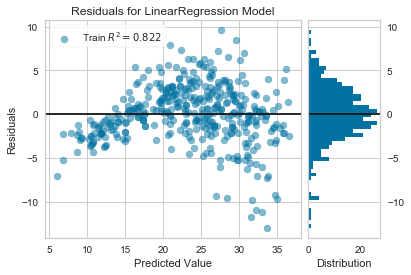

In [161]:
# Residual plot with yellowbick
# .. they're plotting y_hat - y?

regr = LinearRegression()
vis = ResidualsPlot(regr)
vis.fit(X, y)
vis.poof()

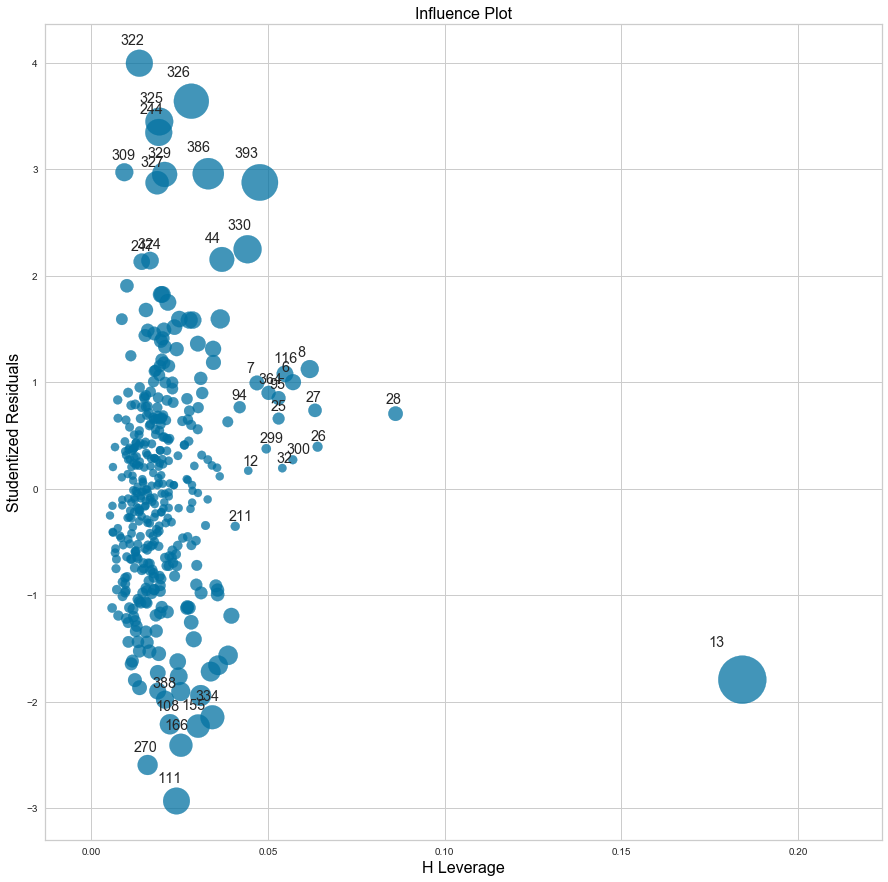

In [162]:
# Influence plot with statsmodels

fig, ax = plt.subplots(figsize=(15,15))
fig = sm.graphics.influence_plot(est,ax=ax, criterion="cooks")

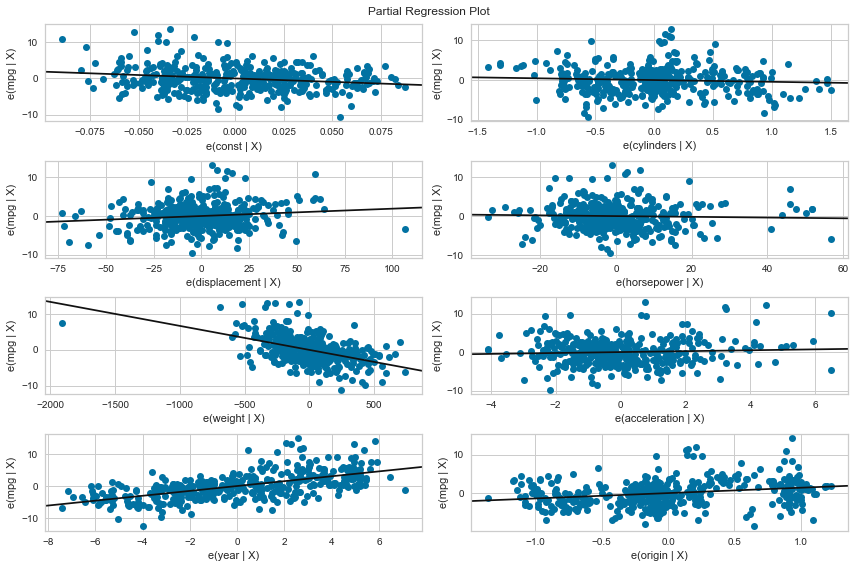

In [163]:
# Partial regression plot matrix with statsmodels

fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(est, fig=fig)

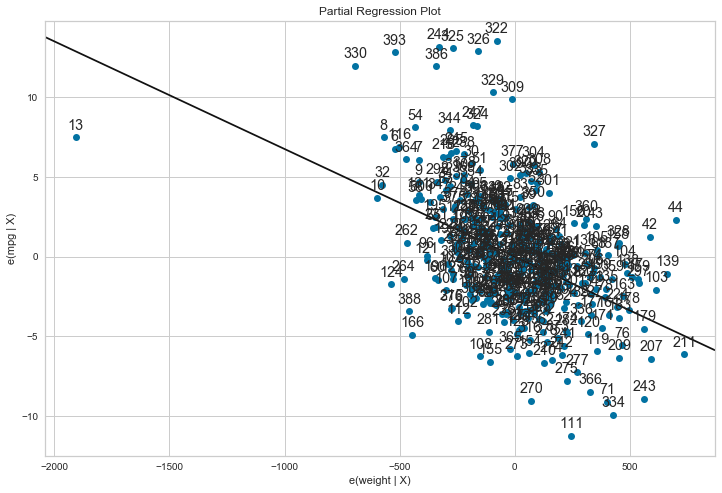

In [164]:
# Partial regression plot / addded variable plot with statsmodels
# https://www.statsmodels.org/dev/generated/statsmodels.graphics.regressionplots.plot_partregress.html

y_name = 'mpg'
indi_name = 'weight'
rest = [x for x in dat.columns.drop([y_name, indi_name, 'name']).values]
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.plot_partregress('mpg', 'weight', rest, data=dat, ax=ax)

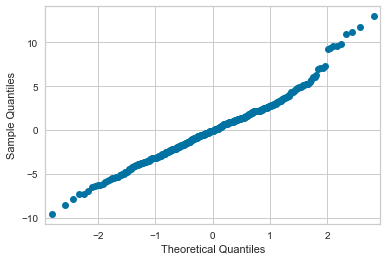

In [165]:
# QQ plot with statsmodels

qq = sm.qqplot(resid)

##### di Comment on any problems you see with the fit.

-  There is a strong pattern in the residuals - which indicates non-linearity in the data.

##### dii Do the residual plots suggest any unusually large outliers?

- Yes, there are 4 observations with studentised residuals > 3

##### diii Does the leverage plot identify any observations with unusually high leverage?

- Yes: observation 13.

##### (e) Fit linear regression models with interaction effects. Do any interactions appear to be statistically significant?

- Yes, both of the interactions yield coeffiecients with statistically significant t-statistcs.

In [462]:
# There are 8 choose 2 = 28 combos.
# Trying out a couple..making mental note about how to search space that could be 
# larger than this.

print('NO INTERACTIONS')
form = 'mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin'
est = smf.ols(formula=form, data=dat).fit()
print(est.summary())
print('-----------------------')

print('CYLINDERS X DISPLACEMENT')
form = 'mpg ~ cylinders * displacement + horsepower + weight + acceleration + year + origin'
est = smf.ols(formula=form, data=dat).fit()
print(est.summary())
print('-----------------------')

print('DISPLACEMENT X HORSEPOWER')
form = 'mpg ~ cylinders + displacement * horsepower + weight + acceleration + year + origin'
est = smf.ols(formula=form, data=dat).fit()
print(est.summary())
print('-----------------------')


NO INTERACTIONS
                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     256.0
Date:                Tue, 04 Sep 2018   Prob (F-statistic):          2.41e-141
Time:                        16:51:50   Log-Likelihood:                -1037.4
No. Observations:                 397   AIC:                             2091.
Df Residuals:                     389   BIC:                             2123.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -18.7116      4.6

##### (f) Try a few different transformations of the variables, such as log(X), √X, X2. Comment on your findings.

- R-squared was improved by log and reciprocal transforms of mpg
-  R-squared was improved by log transforms of independent variables, the p-valued for the
- t-statistics of the transformed variables are smaller - indicating greater statistical significance

In [167]:
print('NO TRANSFORMATIONS')
form = 'mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin'
est = smf.ols(formula=form, data=dat).fit()
print(est.summary())
print('-----------------------')

print('LOG MPG')
form = 'np.log(mpg) ~ cylinders + displacement + horsepower + weight + acceleration + year + origin'
est = smf.ols(formula=form, data=dat).fit()
print(est.summary())
print('-----------------------')

print('RECIPROCAL MPG')
form = 'np.reciprocal(mpg) ~ cylinders + displacement + horsepower + weight + acceleration + year + origin'
est = smf.ols(formula=form, data=dat).fit()
print(est.summary())
print('-----------------------')

print('LOG EVERYTHING SENSIBLE')
form = 'np.log(mpg) ~ cylinders + np.log(displacement) + np.log(horsepower) + np.log(weight) + np.log(acceleration) + year + origin'
est = smf.ols(formula=form, data=dat).fit()
print(est.summary())
print('-----------------------')

NO TRANSFORMATIONS
                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     256.0
Date:                Wed, 05 Sep 2018   Prob (F-statistic):          2.41e-141
Time:                        11:05:05   Log-Likelihood:                -1037.4
No. Observations:                 397   AIC:                             2091.
Df Residuals:                     389   BIC:                             2123.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -18.7116      

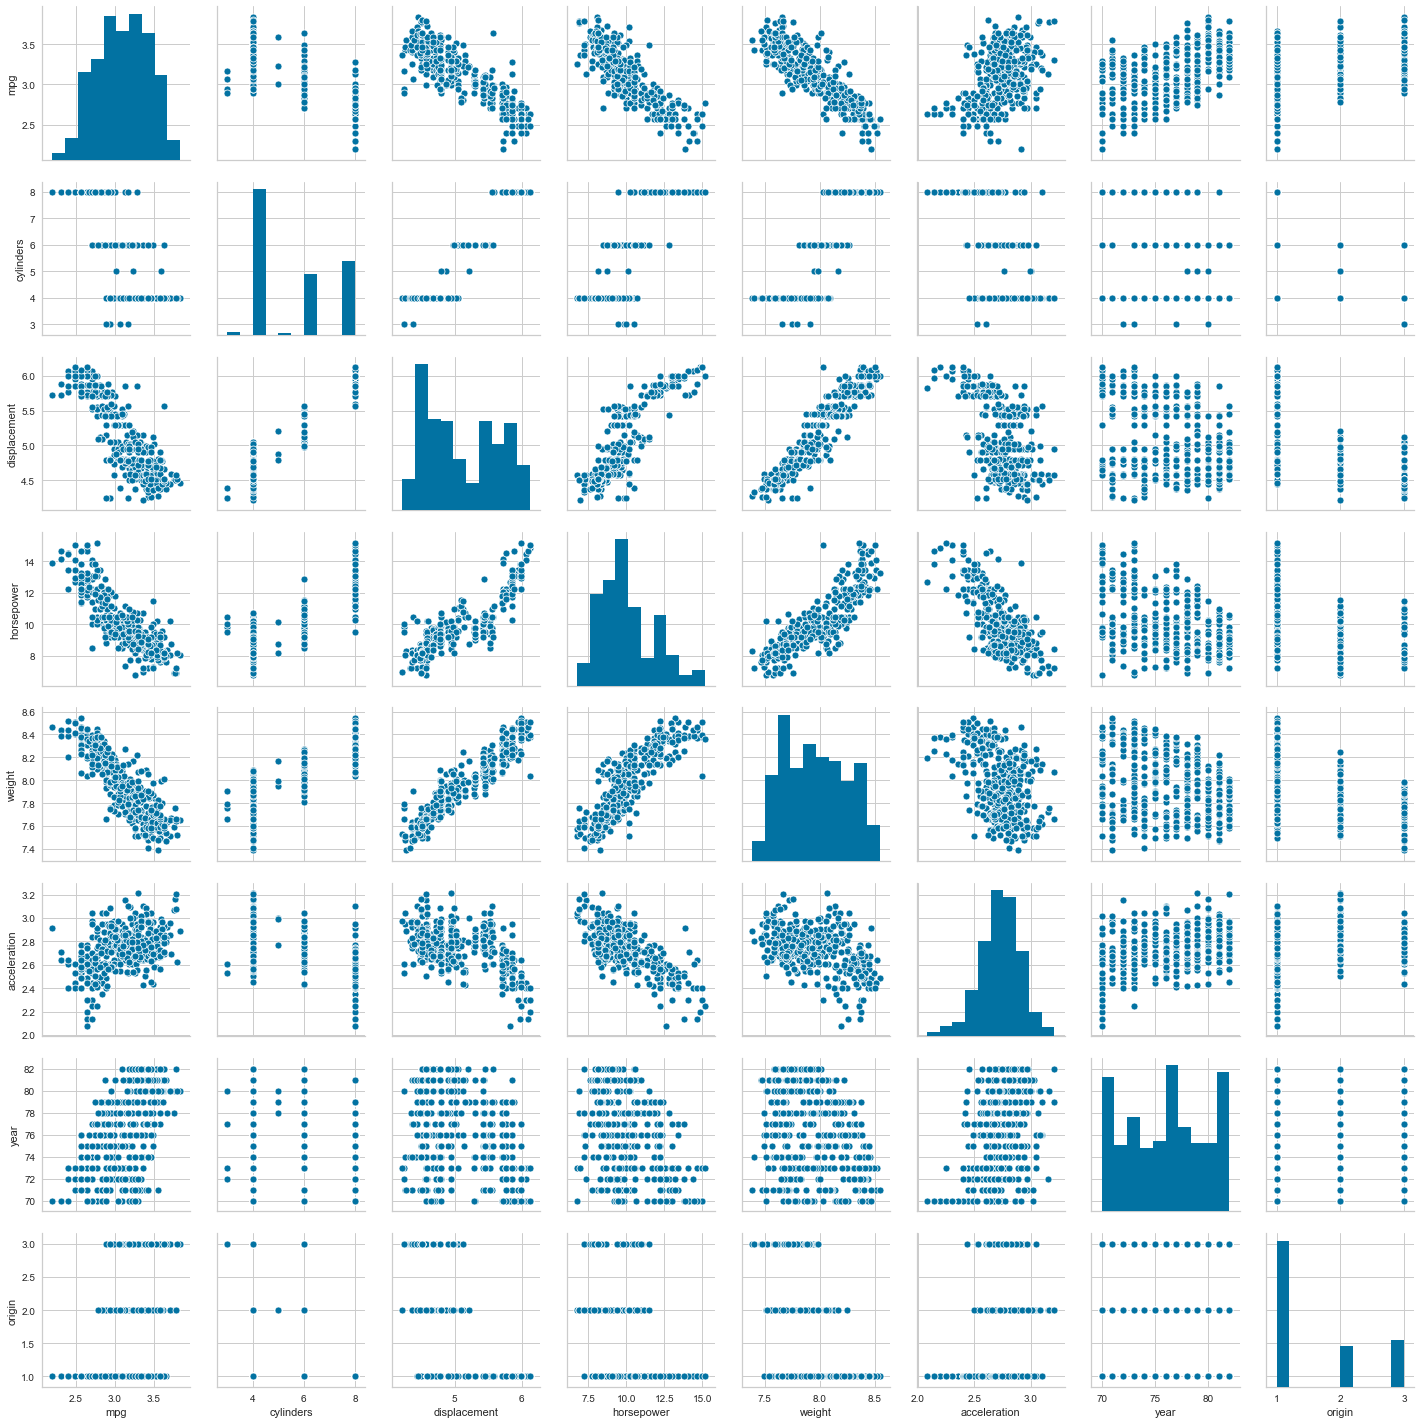

In [464]:
# Visualising variable transformations.

trans = dat.copy()
trans['mpg'] = np.log(dat['mpg'])
trans['displacement'] = np.log(dat['displacement'])
trans['horsepower'] = np.sqrt(dat['horsepower'])
trans['weight'] = np.log(dat['weight'])
trans['acceleration'] = np.log(dat['acceleration'])
sns.pairplot(trans)

#### 10. This question should be answered using the Carseats data set.

##### (a) Fit a multiple regression model to predict Sales using Price, Urban, and US.

In [170]:
car_dat = pd.read_csv('carseats.csv')
car_dat.head()

form = 'Sales ~ Price + Urban + US'
est = smf.ols(formula=form, data=car_dat).fit()
print(est.summary())


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Wed, 05 Sep 2018   Prob (F-statistic):           2.39e-23
Time:                        11:06:16   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       13.0435      0.651     20.036   

##### (b) Provide an interpretation of each coefficient in the model. Be careful some of the variables in the model are qualitative!

*Intercept*: 
- coeff: 13.0435, t-statistic: 20.036, p-value: < 10^-3 sales=13.0435 when urban=No and US=No and Price=0, this is the baseline case.
- p-value indicates this coefficient is statistically significant

*Urban[T.Yes]*:
- coeff: -0.0219, t-statistic: -0.081, p-value: 0.936
- Represents the difference given Urban=Yes; when Urban=Yes there are 0.0219 fewer sales.
- p-value indicates this coefficient is NOT statistically significant.

*US[T.Yes]*:
- coeff: 1.2006, t-statistic: 4.635, p-value: < 10^-3
- Represents the difference given US=Yes; when US=Yes there are 1.2006 more sales.
- p-value indicates this coefficient is statistically significant

*Price*:
- coeff: -0.0545, t-statistic: -10.389, p-value: < 10^-3
- For every incremental unit of price, there are 0.0545 fewer sales
- p-value indicates this coefficient is statistically significant


##### (c) Write out the model in equation form, being careful to handle the qualitative variables properly.

- y = b0 + b1 * Urban[T.Yes] + b2 * US[T.Yes] + b3 * price

i.e:

If Urban and US: y = b0 + b1 + b2 + b3 * price

If Urban and not US: y = b0 + b1 + b3 * price

If not Urban and US: y = b0 + b2 + b3 * price

If not Urban nor US: y = b0 + b3 * price

##### (d) For which of the predictors can you reject the null hypothesis H0 :βj =0?

- Intercept, US[T.Yes], Price


##### (e) On the basis of your response to the previous question, fit a smaller model that only uses the predictors for which there is evidence of association with the outcome.

In [172]:
form = 'Sales ~ Price + US'
est = smf.ols(formula=form, data=car_dat).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Wed, 05 Sep 2018   Prob (F-statistic):           2.66e-24
Time:                        11:10:11   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.0308      0.631     20.652      0.0

##### (f) How well do the models in (a) and (e) fit the data?

- The RSE for the models in (a) and (e), 2.469, which represents 32.941% error.
- The R-squared score for the models in (a) and (e) is 0.239.
- We can interpret this as 23.9% of the variance in Sales is explained by price and US.
- The r-squred score and RSE are unchaged by removing the US variable which is strong evidence that this variable does not contribute to explaining the variance in the dependent variable.
- The F-statistic increases from 41.52 to 62.43 when one removes the US predictor - which we can interpret as..? Even more confident a relationship exists?
- How 'well' the model fits depends on the context - in this domain is 33% error acceptable? are we pleased to be able to explain ~24% of the variance with the predictors?

In [175]:
# "Residual Standard Error"(RSE) = "Standard Error of the Regression"
# "Residual Sum of Squares" (RSS) = "Sum of Squared Residuals"(SSR)
# "Residual Standard Error"(RSE) = "Standard Error of the Regression" = sqrt(scale)

rse = np.sqrt(est.ssr / (car_dat.index.size - 3)) # = np.sqrt(est.scale)
per_error = rse / car_dat['Sales'].mean() * 100
rse = np.round(rse, decimals=3)
per_error = np.round(per_error, decimals=3)
print('RSE = {}, which represents {}% error'.format(rse, per_error))

RSE = 2.469, which represents 32.941% error


##### (g) Using the model from (e), obtain 95% confidence intervals for the coefficient(s).

In [177]:
form = 'Sales ~ Price + US'
est = smf.ols(formula=form, data=car_dat).fit()
est.conf_int(0.05)

0          1
Intercept  11.79032  14.271265
US[T.Yes]   0.69152   1.707766
Price      -0.06476  -0.044195

##### (h) Is there evidence of outliers or high leverage observations in the model from (e)?

- In the eyes of ISL, there are no outliers as the studentized residuals are all < 3
-  In the eyes of ISL, it is not clear how much leverage is significant - there are points that have leverage greater than 2 * (p + 1) / n : these are deemed significant by the statsmodels library.
- (see comments in code below)

expected leverage: 0.0075


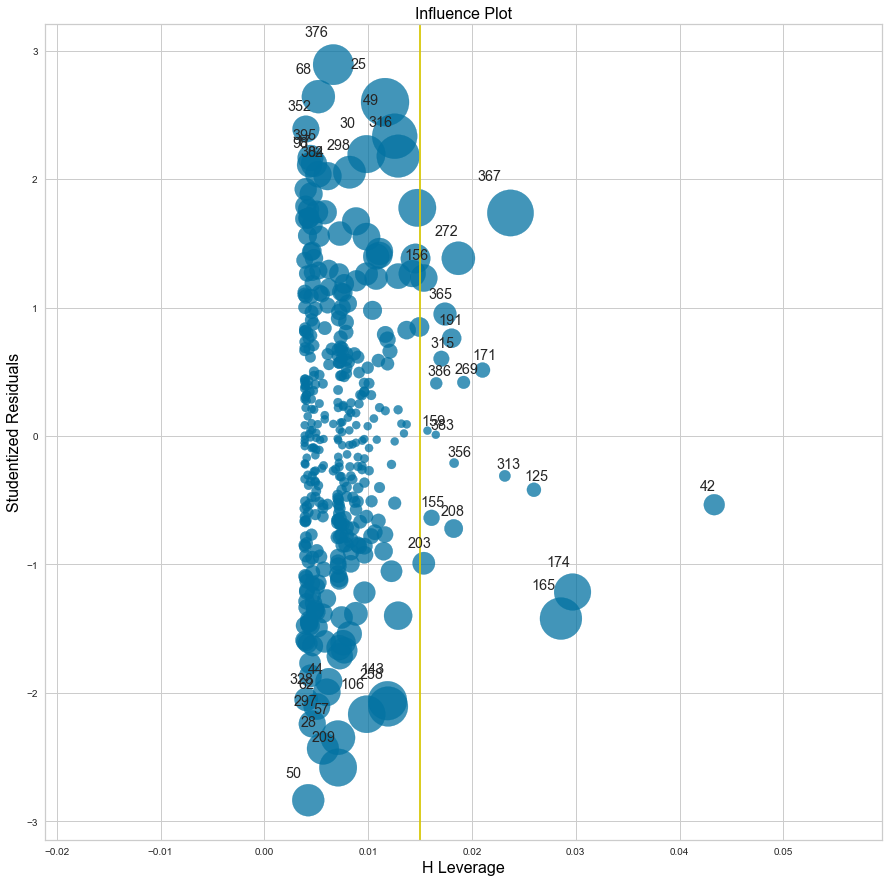

In [178]:
# Influence plot with statsmodels

fig, ax = plt.subplots(figsize=(15,15))
fig = sm.graphics.influence_plot(est,ax=ax, criterion="cooks")

# DETECTING HIGH LEVERAGE POINTS:
# --------------------------------

# In ISL:
# They say expected leverage = (p + 1) / n, values "greatly exceeding" this have high leverage.
# Hmmm... how much greater exactly is "greatly exceeding?"

# In StatsModels docs NOTES for the influence_plot:
# Row labels for the observations in which the leverage,
# measured by the diagonal of the hat matrix,
# is high or the residuals are large, as the combination of large residuals
# and a high influence value indicates an influence point.
# The value of large residuals can be controlled using the alpha parameter.
# ---> Large leverage points are identified as hat_i > 2 * (df_model + 1)/nobs.

# Looks like statsmodels default is to identify high levarage as 2 * (p + 1) / n
# Looks like we can't control this - the alpha paramater is for setting the
# threshold on large residuals - not high leverage.

print('expected leverage: {}'.format((2 + 1) / car_dat.index.size))

# plotting a line at 2 * (p + 1) / n to check I have understood.
plt.axvline(x= (2 * 0.0075), c='y')

# DETECTING OUTLIERS:
# -------------------

# In ISL:
# They say studentized Residuals "greater than 3 in absolute value are possible outliers"

# In StatsModels docs `alpha` paramater for the influence_plot:
# The alpha value to identify large studentized residuals.
# Large means abs(resid_studentized) > t.ppf(1-alpha/2, dof=results.df_resid)

# The defalt value for `alpha` is 0.75.
# t.ppf(1.-alpha/2, est.df_resid) = 0.3188604894390613
# From the plot, it looks like this works out at *studentized* residuals greater than 2 in
# absolute value.


##### 11. In this problem we will investigate the t-statistic for the null hypothesis H0 : β = 0 in simple linear regression without an intercept. To begin, we generate a predictor x and a response y as follows:
```
set . seed (1)
x=rnorm(100)
y=2*x+rnorm(100)
```

In [182]:
# python equivalent
np.random.seed(1)
x = np.random.normal(size=100)
y = 2 * x + np.random.normal(size=100)
norm_data = pd.DataFrame(data={'x':x, 'y':y})

#### (a) Perform a simple linear regression of y onto x, without an intercept.  Report the coefficient estimate β_hat, the standard error of this coefficient estimate, and the t-statistic and p-value associated with the null hypothesis: H0 : β = 0. Comment on these results. You can perform regression without an intercept using the command lm(y∼x+0)

- The coefficeint beta_hat is close to the true paramater=2.0
- The t-statistic has a small p-value (< 10^-3) - this result is statistically significant.

In [185]:
est = smf.ols(formula='y ~ x -1', data=norm_data).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     391.7
Date:                Wed, 05 Sep 2018   Prob (F-statistic):           3.46e-36
Time:                        11:18:00   Log-Likelihood:                -135.67
No. Observations:                 100   AIC:                             273.3
Df Residuals:                      99   BIC:                             275.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x              2.1067      0.106     19.792      0.0

##### (b) Now perform a simple linear regression of x onto y without an intercept, and report the coefficient estimate, its standard error, and the corresponding t-statistic and p-values associated with the null hypothesis H0 : β = 0. Comment on these results.

- The coefficeint beta_hat is close to the true paramater=0.5
- The t-statistic has a small p-value (< 10^-3) - this result is statistically significant.

In [186]:
est = smf.ols(formula='x ~ y -1', data=norm_data).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                      x   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     391.7
Date:                Wed, 05 Sep 2018   Prob (F-statistic):           3.46e-36
Time:                        11:18:54   Log-Likelihood:                -49.891
No. Observations:                 100   AIC:                             101.8
Df Residuals:                      99   BIC:                             104.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
y              0.3789      0.019     19.792      0.0

##### (c) What is the relationship between the results obtained in (a) and (b)?

- y = b_hat * x + epsilon
- for (a) y = 2.0 * x + epsilon
- for (b) x = 0.5 * (y - epsilon)

for example: @ x = 2

*from (a):*

y = 2.1067 * 2 = 4.2134

4.2134 = 2.0 * 2.0 + epsilon

epsilon = 0.2134

*from (b):*

2.0 = 0.5 * (4.2134 - 0.2134)

2.0 = 2.0

##### (d) For the regression of Y onto X without an intercept, the t- statistic for H0 : β = 0 takes the form βˆ/SE(βˆ), where β_hat is given by (3.38), and where (see picture) (These formulas are slightly different from those given in Sec- tions 3.1.1 and 3.1.2, since here we are performing regression without an intercept.) Show algebraically, and confirm numerically in R, that the t-statistic can be written as (see picture)

[question_11_d.jpg](question_11_d.jpg)

In [187]:
x = norm_data['x']
y = norm_data['y']

num = np.sqrt(norm_data.index.size - 1) * sum(x * y)
denom = np.sqrt(sum(x * x) * sum(y * y) - (sum(x * y)) ** 2)

print(num / denom)

19.791801987091272


##### (e) Using the results from (d), argue that the t-statistic for the regression of y onto x is the same as the t-statistic for the regression of x onto y.

- let the result from Q11.d be denoted f(x,y)
- we can see that f(x,y) = f(y,x)

##### (f) In R, show that when regression is performed with an intercept, the t-statistic for H0 : β1 = 0 is the same for the regression of y onto x as it is for the regression of x onto y.

In [190]:
print(smf.ols(formula= 'y ~ x', data=norm_data).fit().summary())
print(smf.ols(formula= 'x ~ y', data=norm_data).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     391.4
Date:                Wed, 05 Sep 2018   Prob (F-statistic):           5.39e-36
Time:                        11:23:12   Log-Likelihood:                -134.44
No. Observations:                 100   AIC:                             272.9
Df Residuals:                      98   BIC:                             278.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1470      0.094      1.564      0.1

#### 12. This problem involves simple linear regression without an intercept.
##### (a) Recall that the coefficient estimate β_hat for the linear regression of Y onto X without an intercept is given by (3.38). Under what circumstance is the coefficient estimate for the regression of X onto Y the same as the coefficient estimate for the regression of Y onto X?

- The numerator is always the same
- The coefficients are different when the denominator is different
- The coefficients are the same when the deonmoinator is the same: i.e: when `sum(x ** 2 ) == sum(y ** 2)`


##### (b) Generate an example in R with n = 100 observations in which the coefficient estimate for the regression of X onto Y is different from the coefficient estimate for the regression of Y onto X.

In [192]:
x = np.random.randn(100)
y = np.random.randn(100)

print(smf.ols(formula='x ~ y -1', data={'x': x, 'y':y}).fit().summary())
print(smf.ols(formula='y ~ x -1', data={'x': x, 'y':y}).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                      x   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                    0.2769
Date:                Wed, 05 Sep 2018   Prob (F-statistic):              0.600
Time:                        11:25:05   Log-Likelihood:                -142.25
No. Observations:                 100   AIC:                             286.5
Df Residuals:                      99   BIC:                             289.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
y             -0.0499      0.095     -0.526      0.6

##### (c) Generate an example in R with n = 100 observations in which the coefficient estimate for the regression of X onto Y is the same as the coefficient estimate for the regression of Y onto X.

In [195]:
x = np.arange(100)
y = np.arange(100)[::-1]

print(smf.ols(formula='x ~ y -1', data={'x': x, 'y':y}).fit().summary())
print(smf.ols(formula='y ~ x -1', data={'x': x, 'y':y}).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                      x   R-squared:                       0.243
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     31.70
Date:                Wed, 05 Sep 2018   Prob (F-statistic):           1.69e-07
Time:                        11:26:36   Log-Likelihood:                -532.84
No. Observations:                 100   AIC:                             1068.
Df Residuals:                      99   BIC:                             1070.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
y              0.4925      0.087      5.630      0.0

#### 13. In this exercise you will create some simulated data and will fit simple linear regression models to it. Make sure to use set.seed(1) prior to starting part (a) to ensure consistent results.

##### (a) Using the rnorm() function, create a vector, x, containing 100 observations drawn from a N(0,1) distribution. This represents a feature, X.

In [199]:
x = np.random.randn(100)

##### (b) Using the rnorm() function, create a vector, eps, containing 100 observations drawn from a N(0,0.25) distribution i.e. a normal distribution with mean zero and variance 0.25.

In [206]:
eps = np.random.normal(0, 0.25, 100)

##### (c) Using x and eps, generate a vector y according to the model: `Y =−1+0.5X+ε`. 

In [219]:
y = -1 + 0.5 * x + eps

##### ci What is the length of the vector y?

In [220]:
print('length of vector y: {}'.format(np.linalg.norm(y)))

length of vector y: 11.56529239894809


##### What are the values of β0 and β1 in this linear model?

- β0 = - 1
- β1 = 0.5

##### Create a scatterplot displaying the relationship between x and y. Comment on what you observe.

- There is a linear relationship with constant variance and positive gradient.

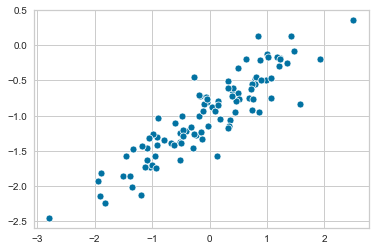

In [222]:
sns.scatterplot(x=x, y=y)

##### (e) Fit a least squares linear model to predict y using x. Comment on the model obtained. How do βˆ0 and βˆ1 compare to β0 and β1?

- We can reject the null hypothesis: p-value for the t-statistic for the βˆ1 coefficient is < 10^-3.
- There is a strong relationship; x explains 81.6% of the variance in y (R=0.816).
- βˆ0 and βˆ1 approximate β0 and β1 closely.


In [226]:
print(smf.ols(formula='y ~ x',data=pd.DataFrame({'x' : x, 'y' :y})).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     433.9
Date:                Wed, 05 Sep 2018   Prob (F-statistic):           8.97e-38
Time:                        11:46:25   Log-Likelihood:                -1.8928
No. Observations:                 100   AIC:                             7.786
Df Residuals:                      98   BIC:                             13.00
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9741      0.025    -39.043      0.0

##### (f) Display the least squares line on the scatterplot obtained in (d). Draw the population regression line on the plot, in a different color. Use the legend() command to create an appropriate legend.

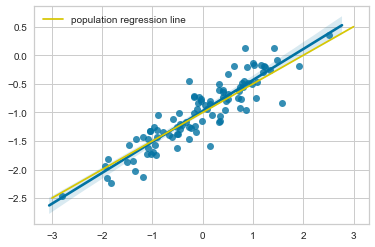

In [244]:
# plotting population regression line in yellow
ax = sns.regplot(x=x, y=y)
x1 = -3
y1 = -1 + 0.5 * x1
x2 =3
y2 = -1 + 0.5 * x2
plt.plot([x1, x2],[y1, y2],c='y', label='population regression line')
plt.legend()

##### (g) Now fit a polynomial regression model that predicts y using x and x^2. Is there evidence that the quadratic term improves the model fit? Explain your answer.

- No
- The R-squared score remains unchanged
- The t-statistic for the coefficient on the polynomial term is not statistically significant.

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     215.6
Date:                Wed, 05 Sep 2018   Prob (F-statistic):           2.00e-36
Time:                        12:14:17   Log-Likelihood:                -1.7262
No. Observations:                 100   AIC:                             9.452
Df Residuals:                      97   BIC:                             17.27
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9636      0.031    -31.002      0.0

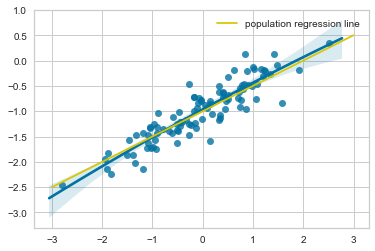

In [253]:
print(smf.ols(formula= 'y ~ x + I(x ** 2)', data=pd.DataFrame({'x':x, 'y':y})).fit().summary())
sns.regplot(x=x,y=y, order=2)
# plotting population regression line in yellow
x1 = -3
y1 = -1 + 0.5 * x1
x2 =3
y2 = -1 + 0.5 * x2
plt.plot([x1, x2],[y1, y2],c='y', label='population regression line')
plt.legend()

##### (h) Repeat (a)–(f) after modifying the data generation process in such a way that there is less noise in the data. The model (3.39) should remain the same. You can do this by decreasing the variance of the normal distribution used to generate the error term ε in (b). Describe your results.

- The R-squared score has increased; indicating a better fit. We also see this in the plot, where it is clear that the RSS has decreased.
- The t-statistic of the coefficient has increased; indicating more confidence in the relationship (the ratio of effect to error has increased)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     2584.
Date:                Wed, 05 Sep 2018   Prob (F-statistic):           3.06e-72
Time:                        12:32:37   Log-Likelihood:                 97.892
No. Observations:                 100   AIC:                            -191.8
Df Residuals:                      98   BIC:                            -186.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.0040      0.009   -109.031      0.0

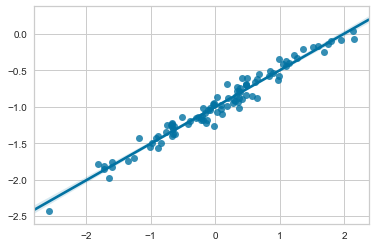

In [266]:
x = np.random.randn(100)
eps = np.random.normal(0, 0.1, 100)
y = - 1 + 0.5 * x + eps
print(smf.ols(formula='y ~ x', data=pd.DataFrame({'x':x, 'y': y})).fit().summary())
sns.regplot(x=x, y=y)

##### (i) Repeat (a)–(f) after modifying the data generation process in such a way that there is more noise in the data. The model (3.39) should remain the same. You can do this by increasing the variance of the normal distribution used to generate the error term ε in (b). Describe your results.

- The R-squared score has decreased; indicating a worse fit. We also see this in the plot, where is is clear the RSS has increased.
- The t-statistic of the coefficient has decreased and its p-value has increased, whilst, the result is still significantly significant, it is less so.

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     3.764
Date:                Wed, 05 Sep 2018   Prob (F-statistic):             0.0553
Time:                        12:38:22   Log-Likelihood:                -202.87
No. Observations:                 100   AIC:                             409.7
Df Residuals:                      98   BIC:                             414.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2510      0.188      6.669      0.0

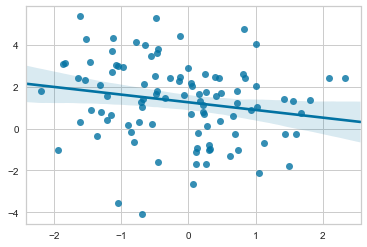

In [280]:
x = np.random.randn(100)
eps = np.random.normal(0, 2, 100)
y = 1 - 0.5 * x + eps
print(smf.ols(formula='y ~ x', data=pd.DataFrame({'x':x, 'y':y})).fit().summary())
sns.regplot(x=x,y=y)

##### (j) What are the confidence intervals for β0 and β1 based on the original data set, the noisier data set, and the less noisy data set? Comment on your results.

- The CI widths increase monotonically with increasing noise
- The intervals are all centered around the poulation regression coefficient; 0.5

In [287]:
x = np.random.randn(100)
eps_orig = np.random.normal(0, 0.25, 100)
eps_quiet = np.random.normal(0, 0.1, 100)
eps_noisey = np.random.normal(0, 2, 100)

y_orig = 1 - 0.5 * x + eps_orig
y_quiet = 1 - 0.5 * x + eps_quiet
y_noisey = 1 - 0.5 * x + eps_noisey

print(smf.ols(formula='y ~ x', data=pd.DataFrame({'x':x, 'y':y_orig})).fit().conf_int(0.05).loc['x']) #0.100231
print(smf.ols(formula='y ~ x', data=pd.DataFrame({'x':x, 'y':y_quiet})).fit().conf_int(0.05).loc['x']) #0.047068
print(smf.ols(formula='y ~ x', data=pd.DataFrame({'x':x, 'y':y_noisey})).fit().conf_int(0.05).loc['x']) #0.80483


0   -0.563428
1   -0.472417
Name: x, dtype: float64
0   -0.523437
1   -0.484602
Name: x, dtype: float64
0   -0.893729
1   -0.151275
Name: x, dtype: float64


#### 14. This problem focuses on the collinearity problem. (a) Perform the following commands in R:
```
> set.seed(1)
> x1=runif(100)
> x2=0.5*x1+rnorm(100)/10
> y=2+2*x1+0.3*x2+rnorm(100)
```
#### The last line corresponds to creating a linear model in which y is a function of x1 and x2. Write out the form of the linear model. What are the regression coefficients?

- `y = bo + b1 * x1 + b2 * x2 + eps`
- where: `b0 = 2, b1 = 2, b2 = 0.3`

In [331]:
# python equivalent
x1 = np.random.uniform(size=100)
x2 = 0.5 * x1 + np.random.randn(100)/10
y = 2 + 2 * x1 + 0.3 * x2 + np.random.randn(100)

#### (b) What is the correlation between x1 and x2? Create a scatterplot displaying the relationship between the variables.

array([[1.        , 0.84348228],
       [0.84348228, 1.        ]])

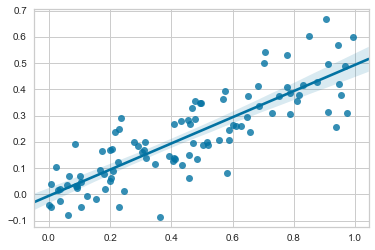

In [302]:
sns.regplot(x=x1, y=x2)
np.corrcoef(x1, x2)

##### (c) Using this data, fit a least squares regression to predict y using x1 and x2. Describe the results obtained. What are βˆ0, βˆ1, and βˆ2? How do these relate to the true β0, β1, and β2? Can you reject the null hypothesis H0 : β1 = 0? How about the null hypothesis H0 : β2 = 0?

- The F-statistic is > 1 and the p-value for t-statistic of the x1 coefficient is statistically significant; we can reject the null hypothesis H0: β1 = β2 = 0.
- The β^0, β^1 coefficients are close to the population paramaters; they have moderately large t-statistics with small p-values - they are statistically significant.
- The β^2 coefficient is not close to the population paramater (relative to the smal size the population paramater); it has a small t-statistic and and a large p-value - it is not statistically significant.
- We CAN reject H0 : β1 = 0.
- We CANNOT reject H0 : β2 = 0.

In [340]:
smf.ols(formula='y ~ x1 + x2', data=pd.DataFrame({'x1' : x1, 'x2' : x2, 'y': y})).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.243
Model:                            OLS   Adj. R-squared:                  0.227
Method:                 Least Squares   F-statistic:                     15.72
Date:                Wed, 05 Sep 2018   Prob (F-statistic):           1.20e-06
Time:                        14:33:28   Log-Likelihood:                -144.38
No. Observations:                 101   AIC:                             294.8
Df Residuals:                      98   BIC:                             302.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2686      0.196     11.558      0.000       1.879       2.658
x1             0.3340      0.536      0.624      0.534      -0.729       1.397
x2             2.6116      0.854      3.060      0.003       0.918       4.305
==============================================================================
Omnibus:                        2.304   Durbin-Watson:                   1.917
Prob(Omnibus):                  0.316   Jarque-Bera (JB):                2.318
Skew:                          -0.348   Prob(JB):                        0.314
Kurtosis:                       2.742   Cond. No.                         10.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### (d) Now fit a least squares regression to predict y using only x1. Comment on your results. Can you reject the null hypothesis H0 :β1 =0?

- The coefficeint β1 has a large t-statistic and corresponding low p-value: we can reject the null hypothesis H0 :β1 =0.

In [333]:
smf.ols(formula='y ~ x1', data = pd.DataFrame({'x1' : x1, 'y' : y})).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.214
Model:                            OLS   Adj. R-squared:                  0.206
Method:                 Least Squares   F-statistic:                     26.75
Date:                Wed, 05 Sep 2018   Prob (F-statistic):           1.23e-06
Time:                        14:29:29   Log-Likelihood:                -142.13
No. Observations:                 100   AIC:                             288.3
Df Residuals:                      98   BIC:                             293.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2382      0.195     11.504      0.000       1.852       2.624
x1             1.7518      0.339      5.172      0.000       1.080       2.424
==============================================================================
Omnibus:                        2.659   Durbin-Watson:                   2.061
Prob(Omnibus):                  0.265   Jarque-Bera (JB):                2.323
Skew:                          -0.268   Prob(JB):                        0.313
Kurtosis:                       2.479   Cond. No.                         4.21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### (e) Now fit a least squares regression to predict y using only x2. Comment on your results. Can you reject the null hypothesis H0 :β1 =0?

- The coefficeint β1 has a large t-statistic and corresponding low p-value: we can reject the null hypothesis H0 :β1 =0.


In [334]:
smf.ols(formula='y ~ x2', data = pd.DataFrame({'x2' : x2, 'y' : y})).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.204
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     25.11
Date:                Wed, 05 Sep 2018   Prob (F-statistic):           2.40e-06
Time:                        14:29:51   Log-Likelihood:                -142.79
No. Observations:                 100   AIC:                             289.6
Df Residuals:                      98   BIC:                             294.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.3630      0.179     13.236      0.000       2.009       2.717
x2             2.8161      0.562      5.011      0.000       1.701       3.931
==============================================================================
Omnibus:                        1.861   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.394   Jarque-Bera (JB):                1.842
Skew:                          -0.319   Prob(JB):                        0.398
Kurtosis:                       2.811   Cond. No.                         5.90
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### (f) Do the results obtained in (c)–(e) contradict each other? Explain your answer.

- No.
- In the absence of eachother each predictor has a statistically significant relationsip with the indipendent variable.
- In the presence of eachother, it is not possible to seperate the effects of the predictors as they are colinear. This increases the standard error, reducing the t-statistic and results in a p-value that is not statistically significant.


##### (g) Now suppose we obtain one additional observation, which was unfortunately mismeasured.
```
> x1=c(x1, 0.1) 
> x2=c(x2, 0.8)
> y=c(y,6)
```
##### Re-fit the linear models from (c) to (e) using this new data. What effect does this new observation have on the each of the models? In each model, is this observation an outlier? A high-leverage point? Both? Explain your answers.

*y ~ x1 + x2*
- F-statistic has increased from 15.72 to 18.58
- R-squared has increased from 0.214 to 0.273
- The x2 coefficient is now statistically significant and the x1 coefficient is not.
- The point is not an outlier as it has a studentized residual < 3
- The point does have high leverage

*y ~ x1*
- F-statistic has decreased from 26.75 to 15.65
- R-squared has decreased from 0.243 to 0.135
- The x1 coefficient is still statistically significat
- The point is an outlier as it has a studentized residual > 3
- The point does not have high leverage

*y ~ x2*
- F-statistic has increased from 25.11 to 37.53
- R-squared has increased from 0.204 to 0.273
- The x2 coefficient is still statistically significant
- The point is an not outlier as it has a studentized residual < 3
- The point does have high leverage


In [341]:
x1 = np.append(x1, 0.1)
x2 = np.append(x2,0.8)
y = np.append(y,6)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.258
Method:                 Least Squares   F-statistic:                     18.58
Date:                Wed, 05 Sep 2018   Prob (F-statistic):           1.41e-07
Time:                        14:34:28   Log-Likelihood:                -146.22
No. Observations:                 102   AIC:                             298.4
Df Residuals:                      99   BIC:                             306.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2865      0.197     11.632      0.0

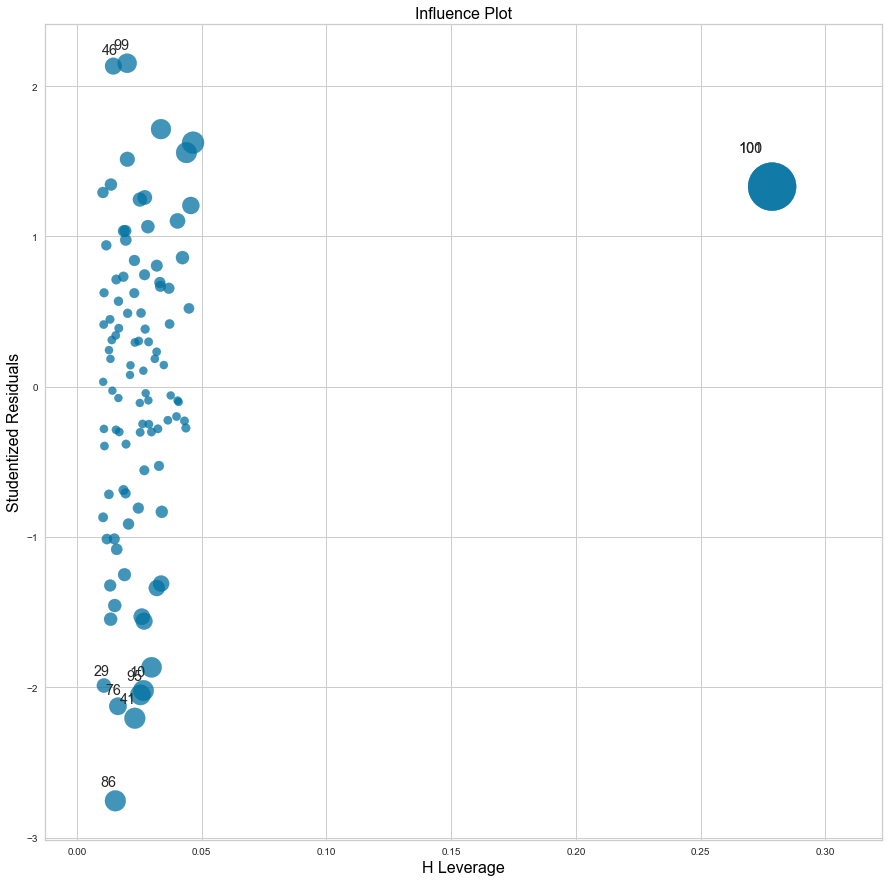

In [342]:
# model 1
est = smf.ols(formula='y ~ x1 + x2', data=pd.DataFrame({'x1' : x1, 'x2' : x2, 'y': y})).fit()

print(est.summary())
fig, ax = plt.subplots(figsize=(15,15))
fig = sm.graphics.influence_plot(est,ax=ax, criterion="cooks")

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.135
Model:                            OLS   Adj. R-squared:                  0.127
Method:                 Least Squares   F-statistic:                     15.65
Date:                Wed, 05 Sep 2018   Prob (F-statistic):           0.000143
Time:                        14:38:43   Log-Likelihood:                -155.06
No. Observations:                 102   AIC:                             314.1
Df Residuals:                     100   BIC:                             319.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.4521      0.209     11.721      0.0

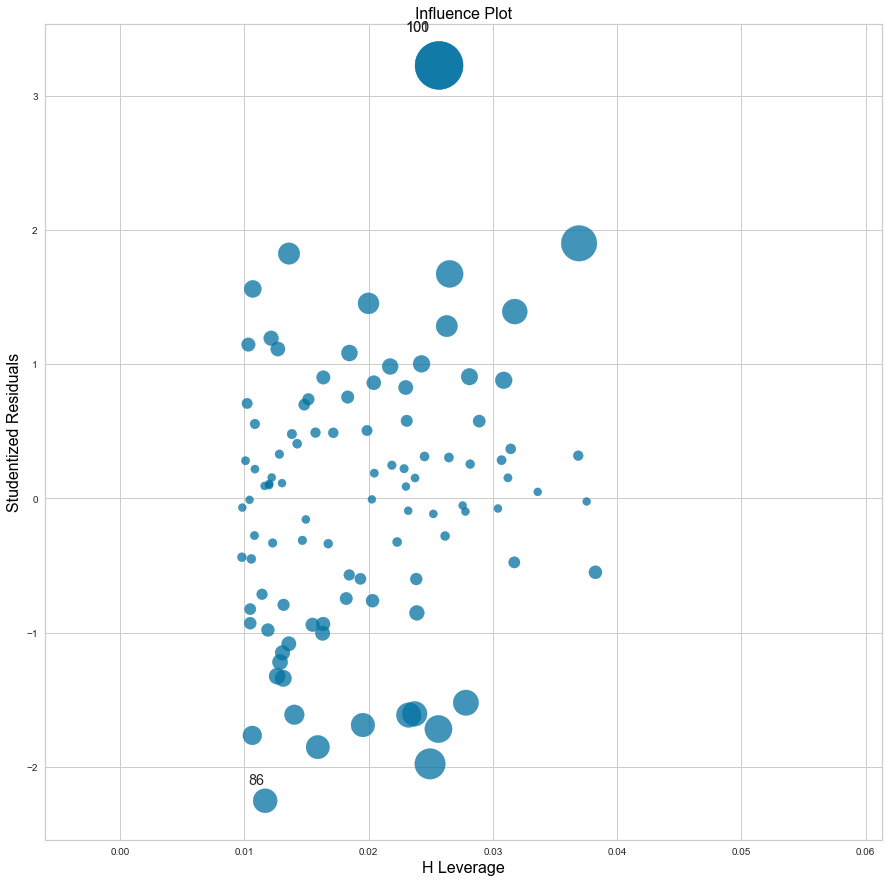

In [343]:
# model 2
est = smf.ols(formula='y ~ x1', data=pd.DataFrame({'x1' : x1, 'x2' : x2, 'y': y})).fit()

print(est.summary())
fig, ax = plt.subplots(figsize=(15,15))
fig = sm.graphics.influence_plot(est,ax=ax, criterion="cooks")

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.266
Method:                 Least Squares   F-statistic:                     37.53
Date:                Wed, 05 Sep 2018   Prob (F-statistic):           1.79e-08
Time:                        14:51:39   Log-Likelihood:                -146.22
No. Observations:                 102   AIC:                             296.4
Df Residuals:                     100   BIC:                             301.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2872      0.174     13.132      0.0

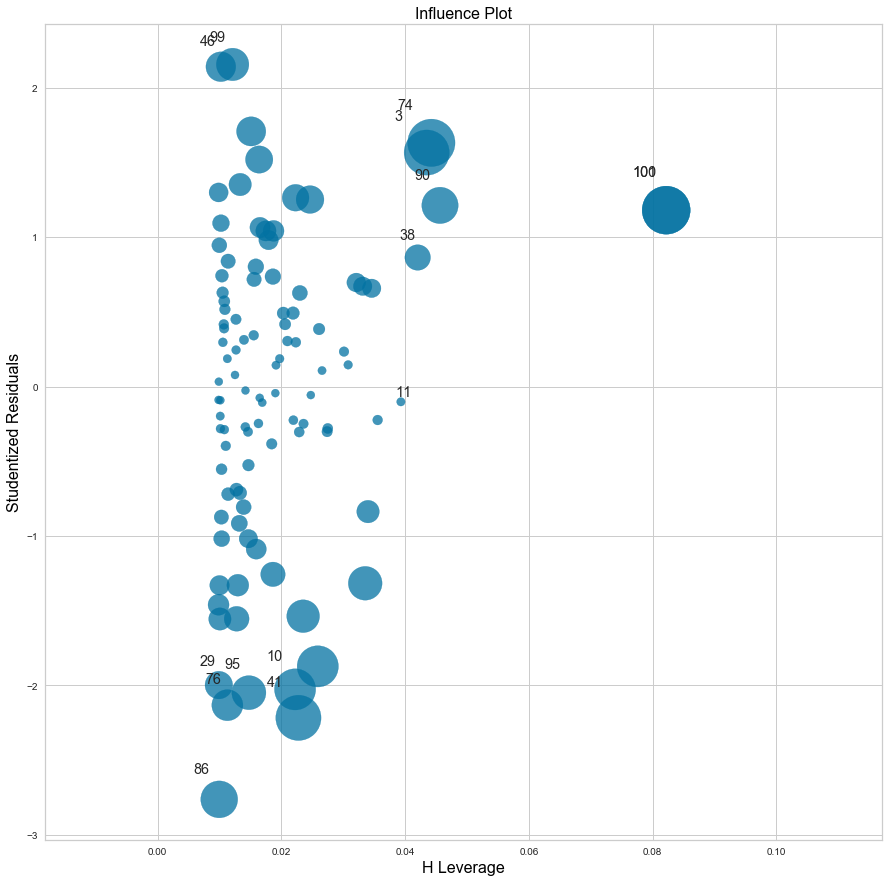

In [345]:
# model 3
est = smf.ols(formula='y ~ x2', data=pd.DataFrame({'x1' : x1, 'y': y})).fit()

print(est.summary())
fig, ax = plt.subplots(figsize=(15,15))
fig = sm.graphics.influence_plot(est,ax=ax, criterion="cooks")

#### 15. This problem involves the Boston data set, which we saw in the lab for this chapter. We will now try to predict per capita crime rate using the other variables in this data set. In other words, per capita crime rate is the response, and the other variables are the predictors.


##### (a) For each predictor, fit a simple linear regression model to predict the response. Describe your results. In which of the models is there a statistically significant association between the predictor and the response? Create some plots to back up your assertions.

- All of the predictors have a statisically significant asssociation with the response with the exception of CHAS.


In [371]:
boston = datasets.load_boston()
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
indi = boston_df.columns.drop('CRIM')
dep = 'CRIM'
for v in indi:
    print(smf.ols(formula='CRIM ~ {}'.format(v), data=boston_df).fit().summary())
    
# ZN            -0.0735      0.016     -4.570      0.000      -0.105      -0.042
# INDUS          0.5068      0.051      9.929      0.000       0.407       0.607
# CHAS          -1.8715      1.505     -1.243      0.214      -4.829       1.086
# NOX           30.9753      3.003     10.315      0.000      25.076      36.875
# RM            -2.6910      0.532     -5.062      0.000      -3.736      -1.646
# AGE            0.1071      0.013      8.409      0.000       0.082       0.132
# DIS           -1.5428      0.168     -9.163      0.000      -1.874      -1.212
# RAD            0.6141      0.034     17.835      0.000       0.546       0.682
# TAX            0.0296      0.002     15.966      0.000       0.026       0.033
# PTRATIO        1.1446      0.169      6.758      0.000       0.812       1.477
# B             -0.0355      0.004     -9.148      0.000      -0.043      -0.028
# LSTAT          0.5444      0.048     11.383      0.000       0.450       0.638

                            OLS Regression Results                            
Dep. Variable:                   CRIM   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     20.88
Date:                Sat, 08 Sep 2018   Prob (F-statistic):           6.15e-06
Time:                        10:35:06   Log-Likelihood:                -1795.8
No. Observations:                 506   AIC:                             3596.
Df Residuals:                     504   BIC:                             3604.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.4292      0.417     10.620      0.0

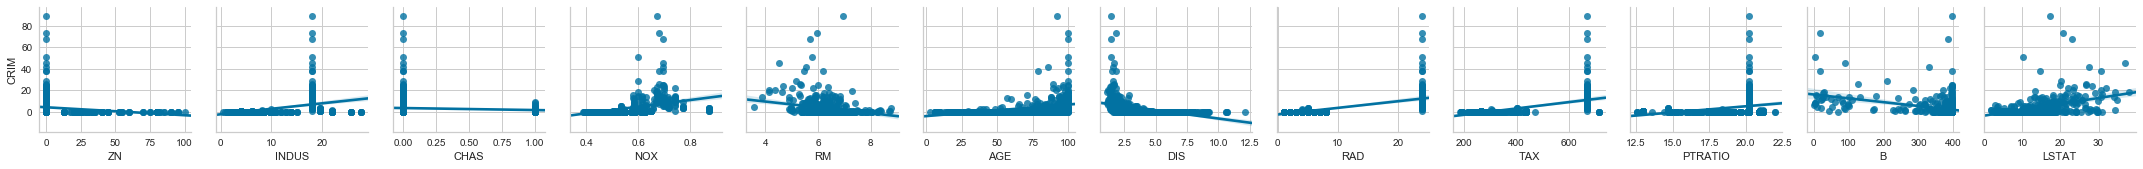

In [370]:
g = sns.PairGrid(boston_df, y_vars=[dep], x_vars=indi)
g.map(sns.regplot)

##### (b) Fit a multiple regression model to predict the response using all of the predictors. Describe your results. For which predictors can we reject the null hypothesis H0 : βj = 0?

- DIS, RAD, B, LSTAT

In [379]:
sm.OLS(boston_df[dep], sm.add_constant(boston_df[indi])).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   CRIM   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.422
Method:                 Least Squares   F-statistic:                     31.77
Date:                Sat, 08 Sep 2018   Prob (F-statistic):           6.16e-54
Time:                        11:07:28   Log-Likelihood:                -1661.2
No. Observations:                 506   AIC:                             3348.
Df Residuals:                     493   BIC:                             3403.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.3701      7.012      1.479      0.140      -3.408      24.148
ZN             0.0365      0.019      1.936      0.053      -0.001       0.073
INDUS         -0.0672      0.085     -0.794      0.428      -0.233       0.099
CHAS          -1.3049      1.185     -1.101      0.271      -3.633       1.023
NOX           -7.2552      5.250     -1.382      0.168     -17.570       3.060
RM            -0.3851      0.575     -0.670      0.503      -1.515       0.745
AGE            0.0019      0.018      0.105      0.917      -0.034       0.038
DIS           -0.7163      0.273     -2.626      0.009      -1.252      -0.180
RAD            0.5395      0.088      6.128      0.000       0.366       0.712
TAX           -0.0013      0.005     -0.254      0.799      -0.011       0.009
PTRATIO       -0.0907      0.180     -0.504      0.615      -0.445       0.263
B             -0.0089      0.004     -2.428      0.016      -0.016      -0.002
LSTAT          0.2309      0.069      3.346      0.001       0.095       0.366
==============================================================================
Omnibus:                      680.813   Durbin-Watson:                   1.507
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            94712.935
Skew:                           6.846   Prob(JB):                         0.00
Kurtosis:                      68.611   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### (c) How do your results from (a) compare to your results from (b)? Create a plot displaying the univariate regression coefficients from (a) on the x-axis, and the multiple regression coefficients from (b) on the y-axis. That is, each predictor is displayed as a single point in the plot. Its coefficient in a simple linear regres- sion model is shown on the x-axis, and its coefficient estimate in the multiple linear regression model is shown on the y-axis.

- In 11 (all except CHAS) of the predictors had statistically significant coefficeints. In (b) only 4 of the predictors had statistically significant coefficeints: DIS, RAD, B and  LSTAT.

- The NOX coefficient is dramatically different; it is large and positive in the univarate regression, large and negative in the multivariate regression.

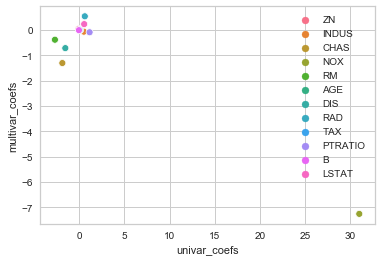

In [394]:
univar_coefs = [-0.0735, 0.5068, -1.8715, 30.9753, \
                -2.6910, 0.1071, -1.5428, 0.6141, \
                0.0296, 1.1446, -0.0355, 0.5444]
multivar_coefs = sm.OLS(boston_df[dep], sm.add_constant(boston_df[indi])).fit().params.drop('const')
plot_dat = pd.DataFrame({'univar_coefs' : univar_coefs, 'multivar_coefs' : multivar_coefs})
sns.scatterplot(x='univar_coefs', y='multivar_coefs', data=plot_dat, hue=multivar_coefs.index)

##### (d) Is there evidence of non-linear association between any of the predictors and the response? To answer this question, for each predictor X, fit a model of the form: 
`Y = β0 +β1X +β2X2 +β3X3 +ε.`

- INDUS, NOX, AGE, DIS, PTRATIO

In [399]:
for v in indi:
    print(smf.ols(formula='CRIM ~ {0} + I({0} ** 2) + I({0} ** 3) '.format(v), data=boston_df).fit().summary())


# ZN            -0.3303      0.110     -3.008      0.003      -0.546      -0.115
# I(ZN ** 2)     0.0064      0.004      1.670      0.096      -0.001       0.014
# I(ZN ** 3) -3.753e-05   3.14e-05     -1.196      0.232   -9.92e-05    2.41e-05    

# INDUS            -1.9533      0.483     -4.047      0.000      -2.901      -1.005
# I(INDUS ** 2)     0.2504      0.039      6.361      0.000       0.173       0.328
# I(INDUS ** 3)    -0.0069      0.001     -7.239      0.000      -0.009      -0.005

# CHAS          1.116e+14    2.7e+14      0.413      0.680    -4.2e+14    6.43e+14
# I(CHAS ** 2) -5.582e+13   1.35e+14     -0.413      0.680   -3.21e+14     2.1e+14
# I(CHAS ** 3) -5.582e+13   1.35e+14     -0.413      0.680   -3.21e+14     2.1e+14

# NOX         -1264.1021    170.860     -7.398      0.000   -1599.791    -928.414
# I(NOX ** 2)  2223.2265    280.659      7.921      0.000    1671.816    2774.637
# I(NOX ** 3) -1232.3894    149.687     -8.233      0.000   -1526.479    -938.300

# RM           -38.7040     31.284     -1.237      0.217    -100.167      22.759
# I(RM ** 2)     4.4655      5.005      0.892      0.373      -5.369      14.300
# I(RM ** 3)    -0.1694      0.264     -0.643      0.521      -0.687       0.348

# AGE             0.2743      0.186      1.471      0.142      -0.092       0.641
# I(AGE ** 2)    -0.0072      0.004     -1.987      0.047      -0.014   -8.25e-05
# I(AGE ** 3)  5.737e-05   2.11e-05      2.719      0.007    1.59e-05    9.88e-05

# DIS           -15.5172      1.737     -8.931      0.000     -18.931     -12.104
# I(DIS ** 2)     2.4479      0.347      7.061      0.000       1.767       3.129
# I(DIS ** 3)    -0.1185      0.020     -5.802      0.000      -0.159      -0.078

# RAD             0.5122      1.047      0.489      0.625      -1.545       2.569
# I(RAD ** 2)    -0.0750      0.149     -0.504      0.615      -0.368       0.218
# I(RAD ** 3)     0.0032      0.005      0.699      0.485      -0.006       0.012

# TAX            -0.1524      0.096     -1.589      0.113      -0.341       0.036
# I(TAX ** 2)     0.0004      0.000      1.476      0.141      -0.000       0.001
# I(TAX ** 3) -2.193e-07   1.89e-07     -1.158      0.247   -5.91e-07    1.53e-07

# PTRATIO           -81.8089     27.649     -2.959      0.003    -136.131     -27.487
# I(PTRATIO ** 2)     4.6039      1.609      2.862      0.004       1.444       7.764
# I(PTRATIO ** 3)    -0.0842      0.031     -2.724      0.007      -0.145      -0.023

# B             -0.0845      0.056     -1.497      0.135      -0.196       0.026
# I(B ** 2)      0.0002      0.000      0.760      0.447      -0.000       0.001
# I(B ** 3)  -2.895e-07   4.38e-07     -0.661      0.509   -1.15e-06     5.7e-07

# LSTAT            -0.4133      0.466     -0.887      0.375      -1.328       0.502
# I(LSTAT ** 2)     0.0530      0.030      1.758      0.079      -0.006       0.112
# I(LSTAT ** 3)    -0.0008      0.001     -1.423      0.155      -0.002       0.000

                            OLS Regression Results                            
Dep. Variable:                   CRIM   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     10.24
Date:                Sat, 08 Sep 2018   Prob (F-statistic):           1.49e-06
Time:                        11:42:03   Log-Likelihood:                -1791.1
No. Observations:                 506   AIC:                             3590.
Df Residuals:                     502   BIC:                             3607.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.8193      0.433     11.133      0.0

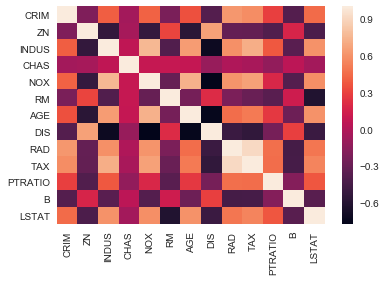

In [400]:
sns.heatmap(boston_df.corr())